In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np
from osgeo import gdal_array
import gdal
import matplotlib.pyplot as plt

In [12]:
np.random.seed(100)

fileName = "out1.tif"


In [13]:
ls

drive/  out1.tif  sample_data/


In [15]:
# Open a GDAL dataset
dataset = gdal.Open(fileName, gdal.GA_ReadOnly)

# Allocate our array using the first band's datatype
image_datatype = dataset.GetRasterBand(1).DataType

image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
                 dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype))

# Loop over all bands in dataset
for b in range(dataset.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = dataset.GetRasterBand(b + 1)   
    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()

print("image shape: ", image.shape)
print()

### numpy array slicing?

b1 = image[:, :, 0].mean()
b2 = image[:, :, 1].mean()
b3 = image[:, :, 2].mean()

print("mean values for band 1, 2, 3: ", b1, b2, b3)

image shape:  (2272, 3847, 4)

mean values for band 1, 2, 3:  62.954417448935885 101.73219059940615 121.36721372882472


Making the image bigger and revisiting calculations

[[57 81 69 ... 11 11 11]
 [57 69 81 ... 11 11 23]
 [57 69 81 ... 11 11 11]
 ...
 [23 11 23 ... 23 23 23]
 [23 23 11 ... 23 23 23]
 [23 23 23 ... 23 23 23]]

(2272, 3847, 4)


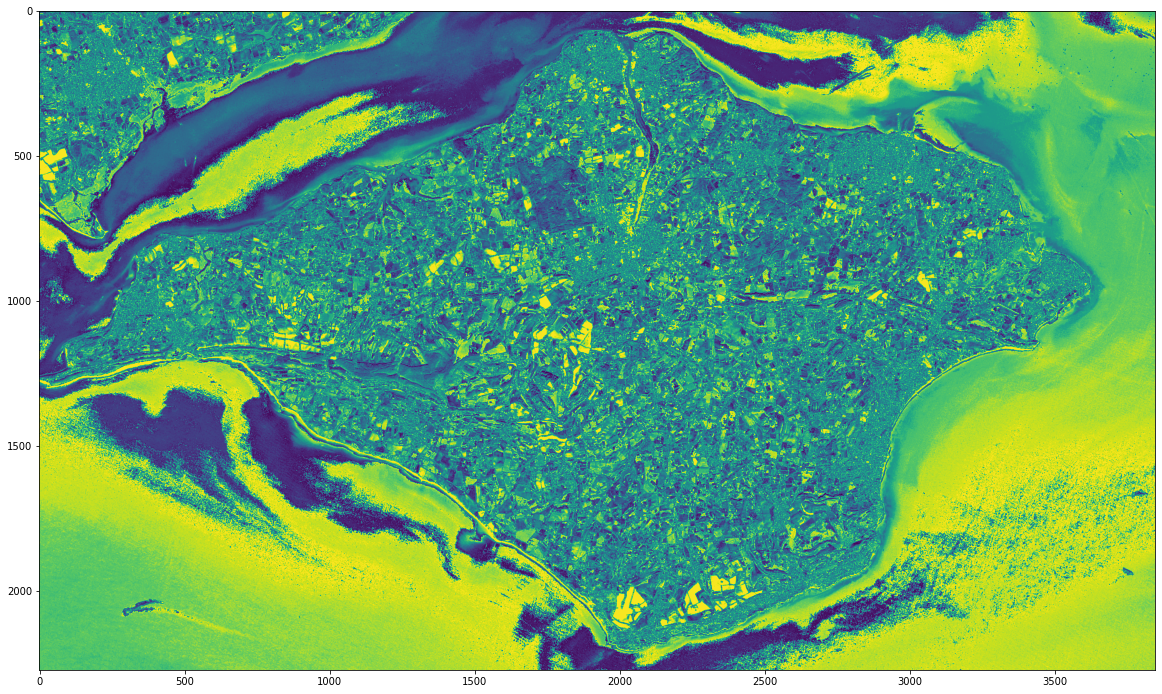

In [16]:
%matplotlib inline
### Graphing is a very useful tool in python and matplotlib is the workhorse here
### Graphing is a very visual way of quickly seeing what is going on with your data

band1 = image[:, :, 0]
band2 = image[:, :, 1]
band3 = image[:, :, 2]

print(band1)
print()
print(image.shape)

## numpy calculations
band_add = band1 + band2 + band3

plt.figure(figsize=(20,20))
plt.imshow(band_add)
plt.show()

reshaping to a 2d array

(2272, 3847)


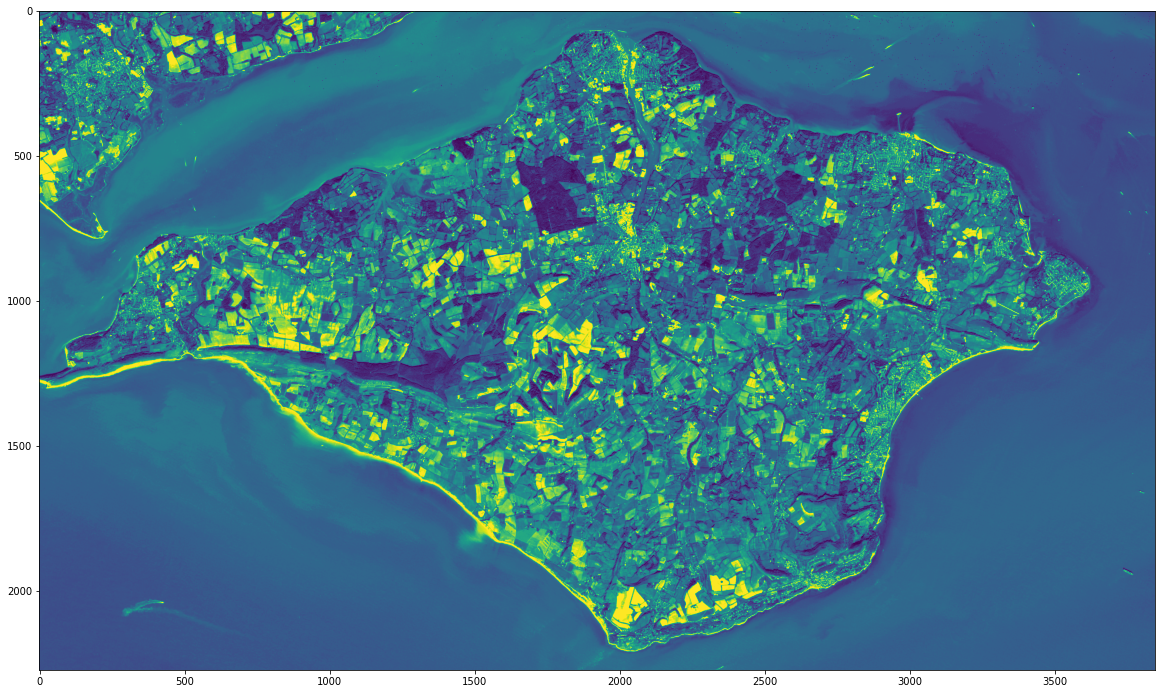

In [17]:
a = image.mean(axis=2)
print(a.shape)

plt.figure(figsize=(20,20))
plt.imshow(a)
plt.show()

# 13 band sentinel 2A image

Read about bands: https://gisgeography.com/sentinel-2-bands-combinations/

In [27]:
### Creating Indicies
    
# Open a GDAL dataset
dataset = gdal.Open('S2_may_South_coast_clip.tif', gdal.GA_ReadOnly)

# Allocate our array using the first band's datatype
image_datatype = dataset.GetRasterBand(1).DataType

image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
                 dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype))

# Loop over all bands in dataset
for b in range(dataset.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = dataset.GetRasterBand(b + 1)
    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()

print("image shape: ", image.shape)


image shape:  (519, 751, 13)


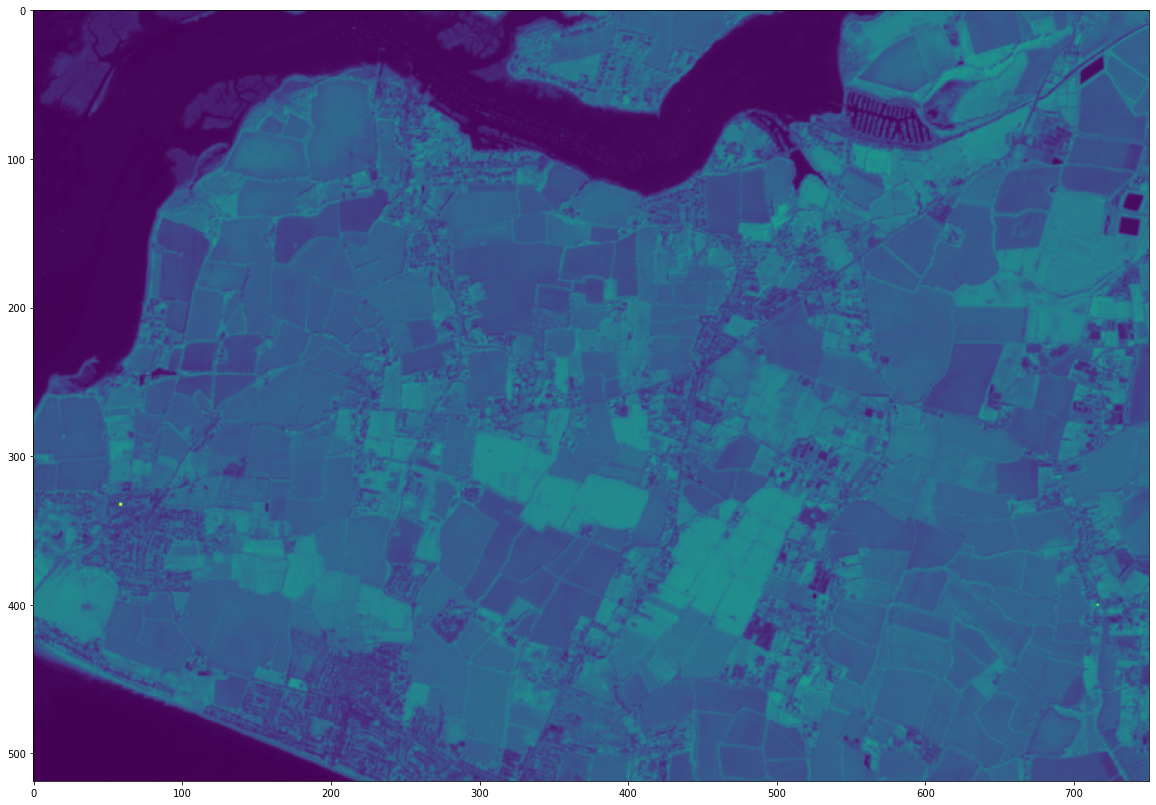

In [31]:
band8 = image[:, :, 7]
plt.figure(figsize=(20,20))
plt.imshow(band8)
plt.show()

Calculate NDVI (Normalized Difference Vegetation Index)

In [32]:
## NDVI = (Band 8 - Band 4)/(Band 8 + Band 4)

band8 = image[:, :, 7]
band4 = image[:, :, 3]

NDVI = ((band8 - band4) / (band8 + band4))

print(NDVI.mean())

0.49780688


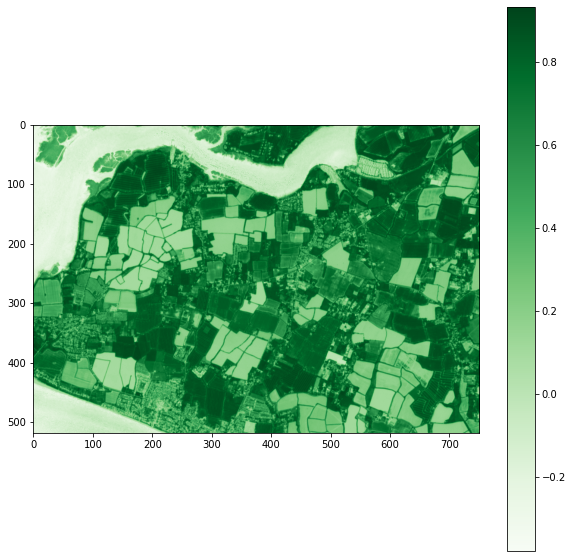

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(NDVI, cmap="Greens") ## hot # reds https://matplotlib.org/examples/color/colormaps_reference.html
plt.colorbar()
plt.show()